<a href="https://colab.research.google.com/github/camiPadilla/SIS420CP/blob/main/Laboratorio2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [144]:
#Implementamos librerias
import os
import numpy as np
#implementamos librerias para graficar
from matplotlib import pyplot
#llamamos a la matplotlib para graficar en los cuadernillos
%matplotlib inline

In [145]:
#mostramos datos con panda
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from datetime import datetime

In [146]:
# cargamos dataset
# Datos sobre precios de viviendas en Bangalore
data = pd.read_csv('/content/Bengaluru_House_Data.csv')

print(data)

                  area_type   availability                  location  \
0      Super built-up  Area         19-Dec  Electronic City Phase II   
1                Plot  Area  Ready To Move          Chikka Tirupathi   
2            Built-up  Area  Ready To Move               Uttarahalli   
3      Super built-up  Area  Ready To Move        Lingadheeranahalli   
4      Super built-up  Area  Ready To Move                  Kothanur   
...                     ...            ...                       ...   
13315        Built-up  Area  Ready To Move                Whitefield   
13316  Super built-up  Area  Ready To Move             Richards Town   
13317        Built-up  Area  Ready To Move     Raja Rajeshwari Nagar   
13318  Super built-up  Area         18-Jun           Padmanabhanagar   
13319  Super built-up  Area  Ready To Move              Doddathoguru   

            size  society total_sqft  bath  balcony   price  
0          2 BHK  Coomee        1056   2.0      1.0   39.07  
1      4 Be

In [147]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [148]:
# Hacemos que Bedroom sea BHK para luego poder eliminarlos en uno
columna_eliminar = ['size']
texto = 'Bedroom'

for columna in columna_eliminar:
    data[columna] = data[columna].str.replace(texto,'BHK',regex = False)

In [149]:
print(data)

                  area_type   availability                  location   size  \
0      Super built-up  Area         19-Dec  Electronic City Phase II  2 BHK   
1                Plot  Area  Ready To Move          Chikka Tirupathi  4 BHK   
2            Built-up  Area  Ready To Move               Uttarahalli  3 BHK   
3      Super built-up  Area  Ready To Move        Lingadheeranahalli  3 BHK   
4      Super built-up  Area  Ready To Move                  Kothanur  2 BHK   
...                     ...            ...                       ...    ...   
13315        Built-up  Area  Ready To Move                Whitefield  5 BHK   
13316  Super built-up  Area  Ready To Move             Richards Town  4 BHK   
13317        Built-up  Area  Ready To Move     Raja Rajeshwari Nagar  2 BHK   
13318  Super built-up  Area         18-Jun           Padmanabhanagar  4 BHK   
13319  Super built-up  Area  Ready To Move              Doddathoguru  1 BHK   

       society total_sqft  bath  balcony   price  


In [150]:
#Eliminamos todos los textos BHK de size
columnas_eliminar =['size']
texto = 'BHK'

for columna in columnas_eliminar:
    data[columna] = data[columna].str.replace(texto,'',regex = False)

print(data)

                  area_type   availability                  location size  \
0      Super built-up  Area         19-Dec  Electronic City Phase II   2    
1                Plot  Area  Ready To Move          Chikka Tirupathi   4    
2            Built-up  Area  Ready To Move               Uttarahalli   3    
3      Super built-up  Area  Ready To Move        Lingadheeranahalli   3    
4      Super built-up  Area  Ready To Move                  Kothanur   2    
...                     ...            ...                       ...  ...   
13315        Built-up  Area  Ready To Move                Whitefield   5    
13316  Super built-up  Area  Ready To Move             Richards Town   4    
13317        Built-up  Area  Ready To Move     Raja Rajeshwari Nagar   2    
13318  Super built-up  Area         18-Jun           Padmanabhanagar   4    
13319  Super built-up  Area  Ready To Move              Doddathoguru   1    

       society total_sqft  bath  balcony   price  
0      Coomee        105

In [151]:
#Hacemos que la columna size deje de ser categorica
columna_categorica = 'size'
columna_numerica = 'sizee'

#creamos una nueva columna con los datos de size pero estos datos son numericos
data[columna_numerica] = pd.to_numeric(data[columna_categorica], errors = 'coerce')

#Eliminamos la columna size original
data.drop(columna_categorica, axis = 1, inplace = True)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   society       7818 non-null   object 
 4   total_sqft    13320 non-null  object 
 5   bath          13247 non-null  float64
 6   balcony       12711 non-null  float64
 7   price         13320 non-null  float64
 8   sizee         13291 non-null  float64
dtypes: float64(4), object(5)
memory usage: 936.7+ KB


In [152]:
# Para posicionar 'price' (y) en la ultima columna, posicionamos a la columna'sizee' antes de la columna 'price' (y)
columnas_ordenadas = list(data.columns)
indice_anterior = columnas_ordenadas.index('balcony')
# insertamos la columna 'sizee' en la posicion de balcony + 1
columnas_ordenadas.insert(indice_anterior + 1, 'sizee')
data = data[columnas_ordenadas]

In [153]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   society       7818 non-null   object 
 4   total_sqft    13320 non-null  object 
 5   bath          13247 non-null  float64
 6   balcony       12711 non-null  float64
 7   sizee         13291 non-null  float64
 8   price         13320 non-null  float64
 9   sizee         13291 non-null  float64
dtypes: float64(5), object(5)
memory usage: 1.0+ MB


In [154]:
# como la columna 'sizee' se repite, eliminaremos la columna duplicada que esta en ultima posicion
data = data.iloc[:, :-1] # primer valor :, es para seleccionar todas las filas, el segundo valor :-1, es para seleccionar la columna, en este caso la ultima

In [155]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   society       7818 non-null   object 
 4   total_sqft    13320 non-null  object 
 5   bath          13247 non-null  float64
 6   balcony       12711 non-null  float64
 7   sizee         13291 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(4), object(5)
memory usage: 936.7+ KB


In [156]:
print(data)

                  area_type   availability                  location  society  \
0      Super built-up  Area         19-Dec  Electronic City Phase II  Coomee    
1                Plot  Area  Ready To Move          Chikka Tirupathi  Theanmp   
2            Built-up  Area  Ready To Move               Uttarahalli      NaN   
3      Super built-up  Area  Ready To Move        Lingadheeranahalli  Soiewre   
4      Super built-up  Area  Ready To Move                  Kothanur      NaN   
...                     ...            ...                       ...      ...   
13315        Built-up  Area  Ready To Move                Whitefield  ArsiaEx   
13316  Super built-up  Area  Ready To Move             Richards Town      NaN   
13317        Built-up  Area  Ready To Move     Raja Rajeshwari Nagar  Mahla T   
13318  Super built-up  Area         18-Jun           Padmanabhanagar  SollyCl   
13319  Super built-up  Area  Ready To Move              Doddathoguru      NaN   

      total_sqft  bath  bal

In [157]:
# almacenamos los datos que sean tipo objeto y tipo fecha en distintas columnas
columnas_categoricas = data.select_dtypes(include=['object']).columns
columnas_fechas = data.select_dtypes(include=['datetime64']).columns

In [158]:
#Agarramos cada columna que se encuntra en las categoricas
for columna in columnas_categoricas:
    le = LabelEncoder()
    data[columna]= le.fit_transform(data[columna])

In [159]:
#Transformamos de Fechas a numeros
for columna in columnas_fechas:
    data[columna]=pd.to_numeric(data[columna].map(datetime.timestamp))

In [160]:
#resultados
print(data)

       area_type  availability  location  society  total_sqft  bath  balcony  \
0              3            40       419      464          70   2.0      1.0   
1              2            80       317     2439        1288   5.0      3.0   
2              0            80      1179     2688         514   2.0      3.0   
3              3            80       757     2186         602   3.0      1.0   
4              3            80       716     2688         239   2.0      1.0   
...          ...           ...       ...      ...         ...   ...      ...   
13315          0            80      1252      209        1499   4.0      0.0   
13316          3            80      1004     2688        1535   5.0      NaN   
13317          0            80       972     1216         172   2.0      1.0   
13318          3            32       907     2205        1680   4.0      1.0   
13319          3            80       396     2688        1747   1.0      1.0   

       sizee   price  
0        2.0   3

In [161]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  int64  
 1   availability  13320 non-null  int64  
 2   location      13320 non-null  int64  
 3   society       13320 non-null  int64  
 4   total_sqft    13320 non-null  int64  
 5   bath          13247 non-null  float64
 6   balcony       12711 non-null  float64
 7   sizee         13291 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(4), int64(5)
memory usage: 936.7 KB


In [162]:
#Rellenamos los datos que faltan // _numero de valores = 13320
columnas_rellenar = ['bath', 'balcony', 'sizee','price']
media_columnas = data[columnas_rellenar].mean()
data[columnas_rellenar] = data[columnas_rellenar].fillna(media_columnas)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  int64  
 1   availability  13320 non-null  int64  
 2   location      13320 non-null  int64  
 3   society       13320 non-null  int64  
 4   total_sqft    13320 non-null  int64  
 5   bath          13320 non-null  float64
 6   balcony       13320 non-null  float64
 7   sizee         13320 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(4), int64(5)
memory usage: 936.7 KB


In [163]:
#lectura de datos
X = data.iloc[:, :8]
y = data.iloc[:, 8]
m = y.size

In [164]:
print(X)
print('-'*25)
print(y)

       area_type  availability  location  society  total_sqft  bath   balcony  \
0              3            40       419      464          70   2.0  1.000000   
1              2            80       317     2439        1288   5.0  3.000000   
2              0            80      1179     2688         514   2.0  3.000000   
3              3            80       757     2186         602   3.0  1.000000   
4              3            80       716     2688         239   2.0  1.000000   
...          ...           ...       ...      ...         ...   ...       ...   
13315          0            80      1252      209        1499   4.0  0.000000   
13316          3            80      1004     2688        1535   5.0  1.584376   
13317          0            80       972     1216         172   2.0  1.000000   
13318          3            32       907     2205        1680   4.0  1.000000   
13319          3            80       396     2688        1747   1.0  1.000000   

       sizee  
0        2.0

In [165]:
# contabilizar filas y columnas
X.shape

(13320, 8)

In [166]:
#Normalizamos
def featureNormalize(X):
  X_norm = X.copy()
  mu = np.zeros(X.shape[1])
  sigma = np.zeros(X.shape[1])

  mu = np.mean(X, axis = 0)
  sigma = np.std(X, axis = 0)
  X_norm = (X - mu) / sigma

  return X_norm, mu, sigma

In [167]:
#Llamamos a featureNormalize con los datos ya cargados
X_norm, mu, sigma = featureNormalize(X)

print(X)
print('Media Calculada :', mu) #media calculada de X
print('Desviación estandar calculada :', sigma) # Desviacion calculada de X
print(X_norm)

       area_type  availability  location  society  total_sqft  bath   balcony  \
0              3            40       419      464          70   2.0  1.000000   
1              2            80       317     2439        1288   5.0  3.000000   
2              0            80      1179     2688         514   2.0  3.000000   
3              3            80       757     2186         602   3.0  1.000000   
4              3            80       716     2688         239   2.0  1.000000   
...          ...           ...       ...      ...         ...   ...       ...   
13315          0            80      1252      209        1499   4.0  0.000000   
13316          3            80      1004     2688        1535   5.0  1.584376   
13317          0            80       972     1216         172   2.0  1.000000   
13318          3            32       907     2205        1680   4.0  1.000000   
13319          3            80       396     2688        1747   1.0  1.000000   

       sizee  
0        2.0

In [168]:
#Añade intersección a x
#(Columnas de unos para X0)
X = np.concatenate([np.ones((m, 1)), X_norm], axis = 1)

print(X)

[[ 1.          0.62046076 -1.67893016 ... -0.51775126 -0.73199725
  -0.62301468]
 [ 1.         -0.25381591  0.48177474 ...  1.72485942  1.77323081
   0.9238727 ]
 [ 1.         -2.00236924  0.48177474 ... -0.51775126  1.77323081
   0.15042901]
 ...
 [ 1.         -2.00236924  0.48177474 ... -0.51775126 -0.73199725
  -0.62301468]
 [ 1.          0.62046076 -2.11107115 ...  0.97732252 -0.73199725
   0.9238727 ]
 [ 1.          0.62046076  0.48177474 ... -1.26528816 -0.73199725
  -1.39645837]]


In [169]:
def costo(X, y, theta):
  #inicializamos valores
  m = y.shape[0] #numero de ejemplos de entrenamiento

  J = 0
  h = np.dot(X, theta)
  J = (1/(2*m))*np.sum(np.square(np.dot(X, theta)-y))
  return J

In [170]:
def gradiente(X, y, theta, alpha, num_iters):
  #inicializamos valores
  m= y.shape[0] #numero de ejemplos de entrenamiento
  #realizamos una copia de theta el cual sera actualizado por decenso de la gradiente
  theta = theta.copy()
  J_history = []
  for i in range(num_iters):
    theta = theta - (alpha / m)*(np.dot(X, theta)-y).dot(X)
    J_history.append(costo(X, y, theta))

  return theta, J_history

theta calculado por el descenso de la gradiente: [ 1.11809060e+02  2.15701473e-01 -9.05750190e-01  1.71351033e+00
 -8.78788333e-04  2.45563875e+01  4.57869068e+01  6.05534574e+00
  1.62081117e+01]
El precio predecito es (usando el decenso de la gradiente): 136.2828


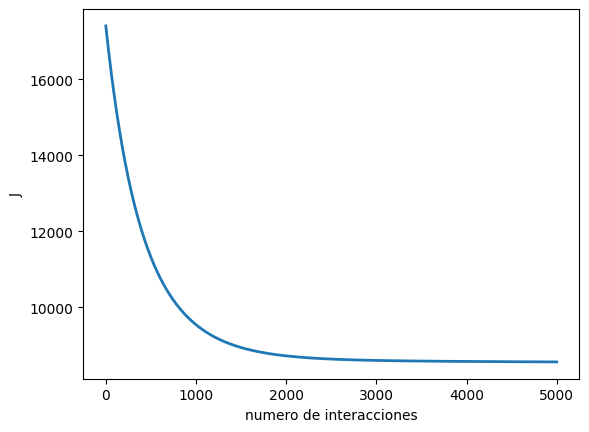

In [171]:
#elegimos algun valor para alpha
alpha = 0.001
num_iters = 5000

#iniciamos theta e inicializaos el decenso de las gradientes
theta = np.zeros(9)
theta, J_history = gradiente(X, y, theta, alpha, num_iters)

#graficamos el costo
pyplot.plot(np.arange(len(J_history)), J_history, lw = 2)
pyplot.xlabel('numero de interacciones')
pyplot.ylabel('J')

#Muestra los resultados del descenso por el gradiente
print('theta calculado por el descenso de la gradiente: {:s}'.format(str(theta)))

#Estimamos el precio
X_array = [1, 3, 80 ,849 ,1526 ,602 ,4.0 ,1.000000, 2.0]
X_array[1: 9] = (X_array[1:9]- mu)/ sigma
price = np.dot(X_array, theta)

print('El precio predecito es (usando el decenso de la gradiente): {:.4f}'.format(price))

In [172]:
def calcularThethaEcuacionNormal(X, y):
    theta = np.zeros(X.shape[1])
    theta = np.dot(np.dot(np.linalg.inv(np.dot(X.T,X)),X.T),y)
    return theta

In [173]:
theta = calcularThethaEcuacionNormal(X, y);
print(f"los valores de theta calculados son: { theta }")


los valores de theta calculados son: [112.5656265   -0.12440253  -0.36555714   1.411198     0.53552757
  23.55230069  67.08510672   5.63757539  -5.00660601]


In [174]:
X_array = [1, 3, 80 ,849 ,1526 ,602 ,4.0 ,1.000000, 2.0]
price = np.dot(X_array, theta)

print('Precio predecido (usando la ecuación de la normal): ${:.0f}'.format(price))

Precio predecido (usando la ecuación de la normal): $16541
